In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
TrainData = pd.read_csv('/content/drive/My Drive/Data Science Place/Hackathon 1 - Credit card customer 2020/Data/Train.csv')
TestData = pd.read_csv('/content/drive/My Drive/Data Science Place/Hackathon 1 - Credit card customer 2020/Data/Test.csv')

In [58]:
print("Train data shape: ", TrainData.shape)
print("Test data shape: ", TestData.shape)

Train data shape:  (15000, 44)
Test data shape:  (5000, 43)


In [ ]:
TrainData.isnull().sum()

# **It's look like there were no any null value in given dataset.**

# Let's check some **analysis** on dataset.

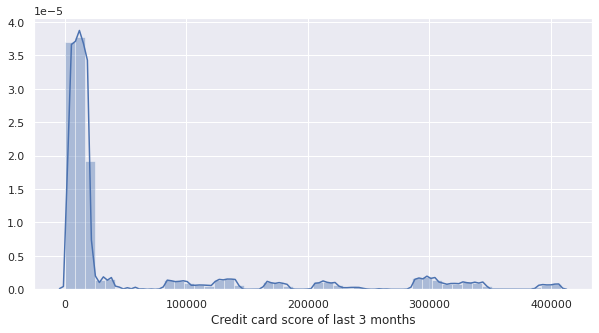

In [59]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(TrainData['cc_cons'],axlabel="Credit card score of last 3 months")

# **Here, what we can observed data for CC_cons not normally distributed.**
### We can clearly observe that data is not normally distributed for target label and it is left skewed and most of our data does not lie near central tendency

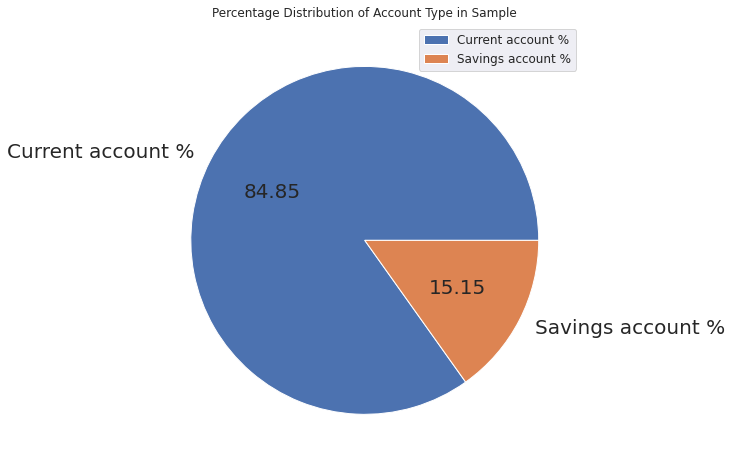

In [60]:
acc_type = TrainData['account_type'].value_counts()
labels_acc = 'Current account %', 'Savings account %'
plt.figure(figsize=(8,8))
plt.title("Percentage Distribution of Account Type in Sample")
plt.pie(acc_type, labels = labels_acc, autopct='%1.2f', textprops={'fontsize': 20})
plt.legend(prop={'size': 12})

# **The bank has more number of current accounts as compared to savings accounts**

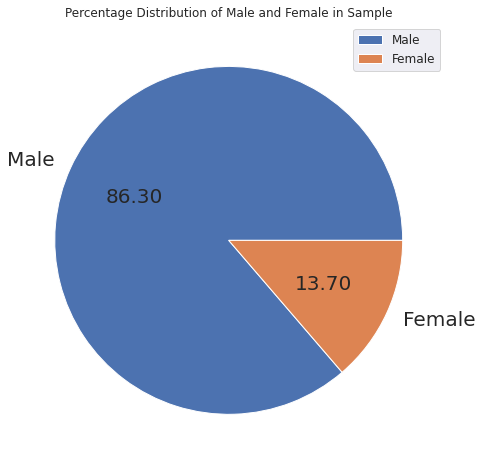

In [ ]:
acc_type = TrainData['gender'].value_counts()
labels_acc = 'Male', 'Female'
plt.figure(figsize=(8,8))
plt.title("Percentage Distribution of Male and Female in Sample")
plt.pie(acc_type, labels = labels_acc, autopct='%1.2f', textprops={'fontsize': 20})
plt.legend(prop={'size': 12})

# **The bank has more number of "Male" customers**

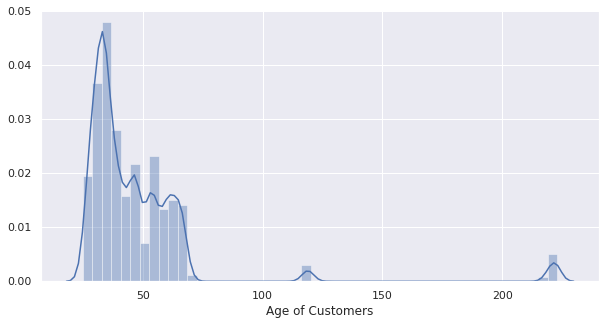

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(TrainData['age'],axlabel="Age of Customers")

# **We can observed that maximum people lies between 25 to 85 AGE Group..3% of them are ouliers**
## Our readings shows that age of data somewhere close to normal distribution except few of the outliers.

In [ ]:
def age_buckets(x): 
  if x >=25 and x<=35:
      return '25-35' 
  elif x >=36 and x<=50: 
      return '36-50' 
  elif x > 50: 
      return '50+' 

TrainData['AgeRange'] = TrainData.age.apply(age_buckets)

In [ ]:
TrainData['AgeRange'].value_counts()

25-35    5971
50+      4625
36-50    4404
Name: AgeRange, dtype: int64

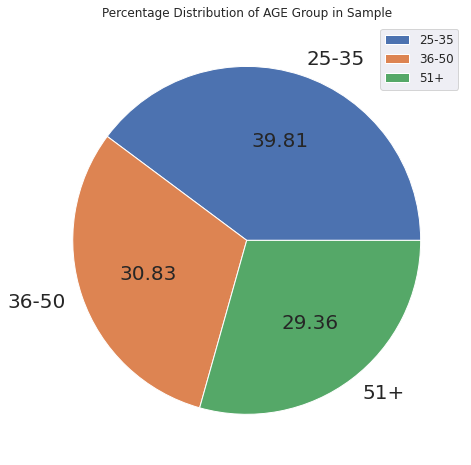

In [ ]:
ageRange = TrainData['AgeRange'].value_counts()
labels = ['25-35','36-50','51+']
plt.figure(figsize=(8,8))
plt.title("Percentage Distribution of AGE Group in Sample")
plt.pie(ageRange, labels = labels, autopct='%1.2f', textprops={'fontsize': 20})
plt.legend(prop={'size': 12})

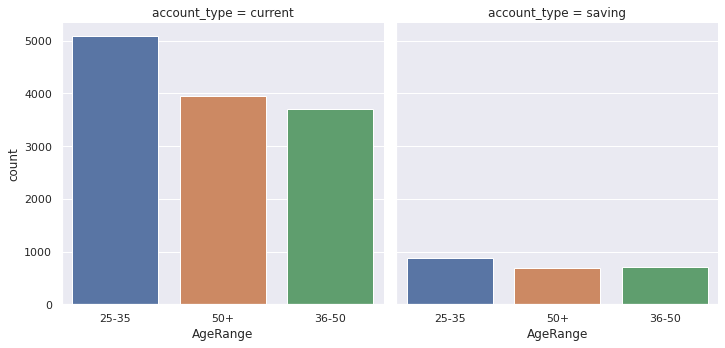

In [ ]:

sns.catplot(x='AgeRange', col='account_type', kind='count', data=TrainData)

# **Age wise distribution in account type.**

In [ ]:
TrainData.drop(columns= ['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'], inplace=True)

In [ ]:
corr = TrainData.corr()
corr.style.background_gradient(cmap='coolwarm')

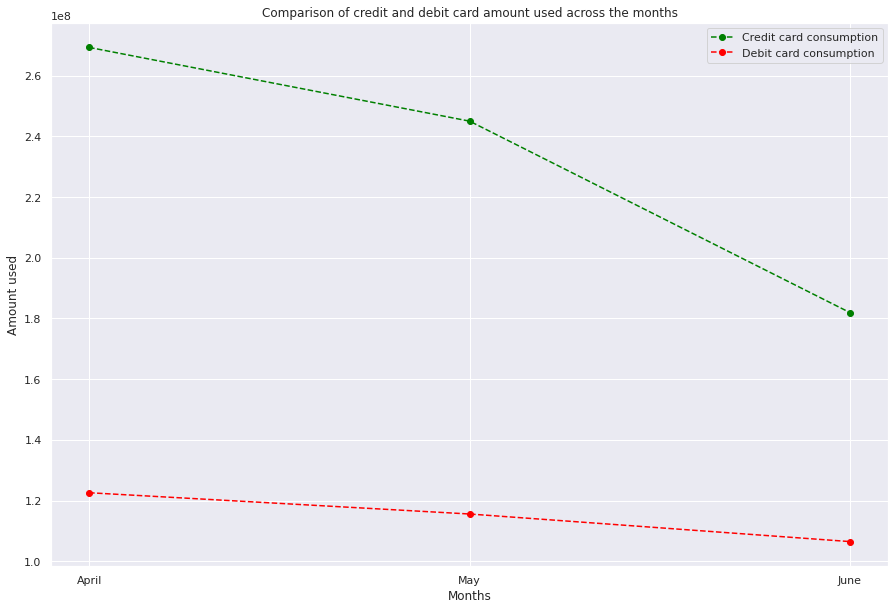

In [ ]:
cols = ['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun']

cols_df = TrainData[cols].sum()
cc_monthwise = {'April': cols_df['cc_cons_apr'], 'May': cols_df['cc_cons_may'], 'June': cols_df['cc_cons_jun']}
dc_monthwise = {'April': cols_df['dc_cons_apr'], 'May': cols_df['dc_cons_may'], 'June': cols_df['dc_cons_jun']}

lists = cc_monthwise.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)
plt.plot(x, y, color='green', marker='o', linestyle='--', label='Credit card consumption')

lists = dc_monthwise.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card consumption')

plt.title("Comparison of credit and debit card amount used across the months")
plt.xlabel("Months")
plt.ylabel("Amount used")
plt.legend()
plt.show()

# **As per above observation here we can say that credit card users are more then debit card users. We can see the downward trend in both type of cards in month of June.**

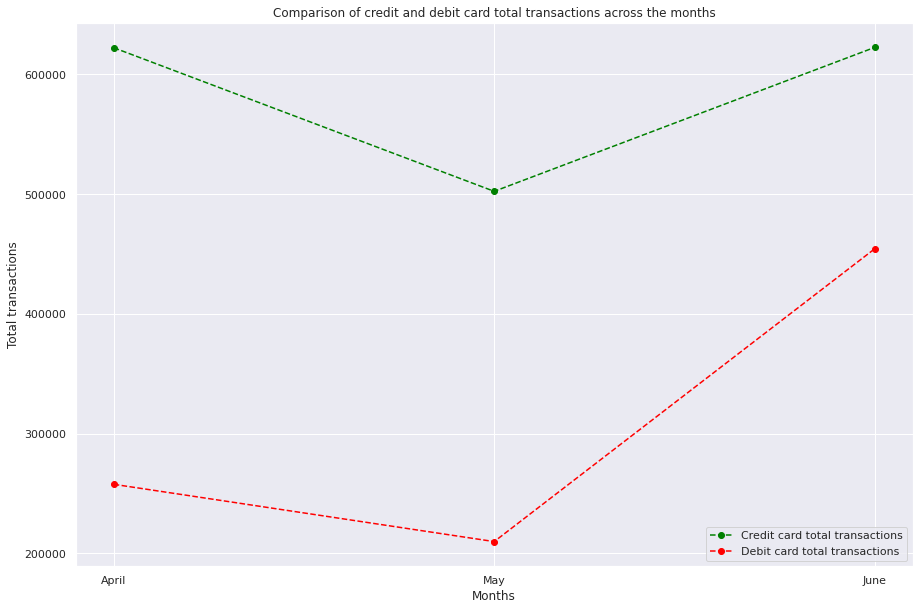

In [ ]:
#credit/debit card total transactions for the months of April, May and June
cols = ['cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun']

cols_df = TrainData[cols].sum()
cc_monthwise_count = {'April': cols_df['cc_count_apr'], 'May': cols_df['cc_count_may'], 'June': cols_df['cc_count_jun']}
dc_monthwise_count = {'April': cols_df['dc_count_apr'], 'May': cols_df['dc_count_may'], 'June': cols_df['dc_count_jun']}

lists = cc_monthwise_count.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)
plt.plot(x, y, color='green', marker='o', linestyle='--', label='Credit card total transactions')

lists = dc_monthwise_count.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card total transactions')

plt.title("Comparison of credit and debit card total transactions across the months")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend(loc = 'lower right')
plt.show()

# **Both credit and debit card transactions increased in the month of June. We observed earlier that the downward trend in both card types in month of June. Amount decreased and transactions increased, here can we say that more transactions with smaller amount occured in the month of June.**

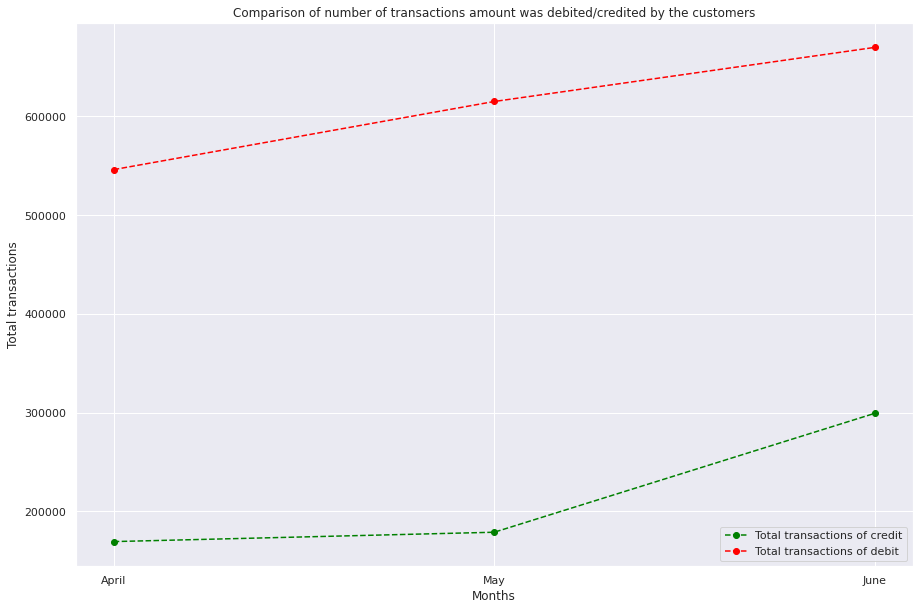

In [ ]:
#total number of times amount were debited/credited in account for the months of April, May and June
cols = ['debit_count_apr','debit_count_may','debit_count_jun','credit_count_apr','credit_count_may','credit_count_jun']

cols_df = TrainData[cols].sum()
monthwise_debit = {'April': cols_df['debit_count_apr'], 'May': cols_df['debit_count_may'], 'June': cols_df['debit_count_jun']}
monthwise_credit = {'April': cols_df['credit_count_apr'], 'May': cols_df['credit_count_may'], 'June': cols_df['credit_count_jun']}

lists = monthwise_credit.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)
plt.plot(x, y, color='green', marker='o', linestyle='--', label='Total transactions of credit')

lists = monthwise_debit.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total transactions of debit')

plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend(loc = 'lower right')
plt.show()

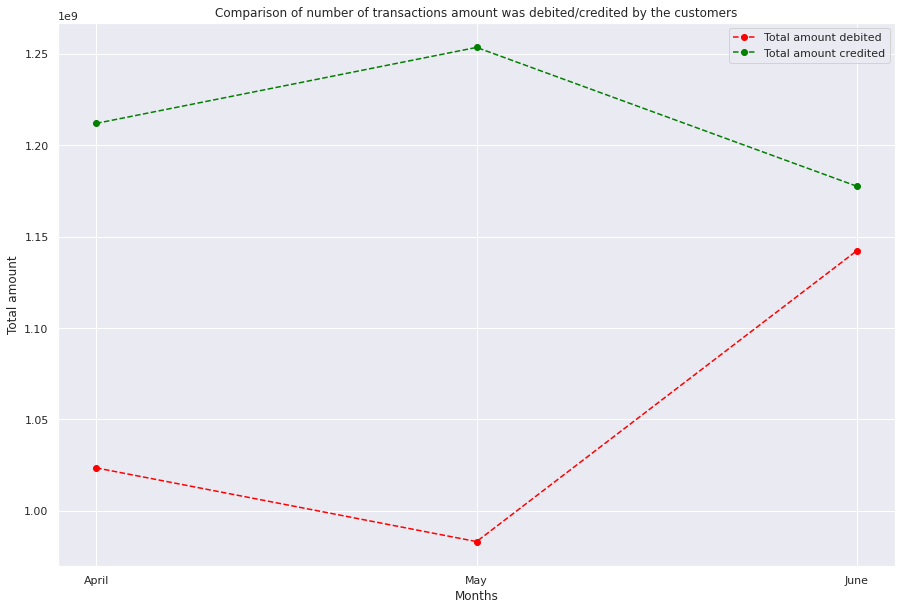

In [ ]:
#total amount debited/credited in account for the months of April, May and June
cols = ['credit_amount_apr','credit_amount_may','credit_amount_jun','debit_amount_apr','debit_amount_may','debit_amount_jun']

cols_df = TrainData[cols].sum()
monthwise_debit_amt = {'April': cols_df['debit_amount_apr'], 'May': cols_df['debit_amount_may'], 'June': cols_df['debit_amount_jun']}
monthwise_credit_amt = {'April': cols_df['credit_amount_apr'], 'May': cols_df['credit_amount_may'], 'June': cols_df['credit_amount_jun']}

lists = monthwise_debit_amt.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total amount debited')

lists = monthwise_credit_amt.items() 
x, y = zip(*lists)
plt.plot(x, y, color='green', marker='o', linestyle='--', label='Total amount credited')

plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total amount")
plt.legend()
plt.show()

# **We can observe that the amount being debited has increased in the month of June and also the amount being credited has decreased.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


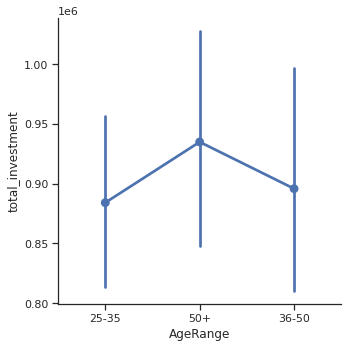

In [ ]:
sns.set(style="ticks")
sns.factorplot(x='AgeRange', y='total_investment', data=TrainData)

# **We can clearly observe that most of the investment that too with highest amount is done by people above age 50.**

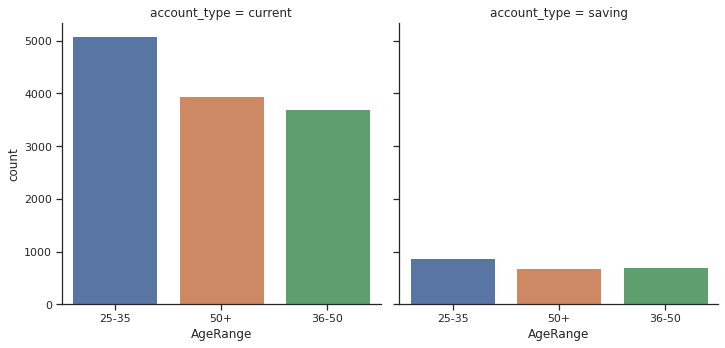

In [ ]:
sns.catplot(x='AgeRange', col='account_type', kind='count', data=TrainData)

# **We can see that most of the people who are above 50+ , most of them have current account and hence the investment was more here.**

In [ ]:
TrainData['total_investment']= TrainData['investment_1']+TrainData['investment_2']+TrainData['investment_3']+abs(TrainData['investment_4'])

TrainData['investment1_per']=TrainData['investment_1']/TrainData['total_investment']*100
TrainData['investment2_per']=TrainData['investment_2']/TrainData['total_investment']*100
TrainData['investment3_per']=TrainData['investment_3']/TrainData['total_investment']*100
TrainData['investment4_per']=abs(TrainData['investment_4'])/TrainData['total_investment']*100

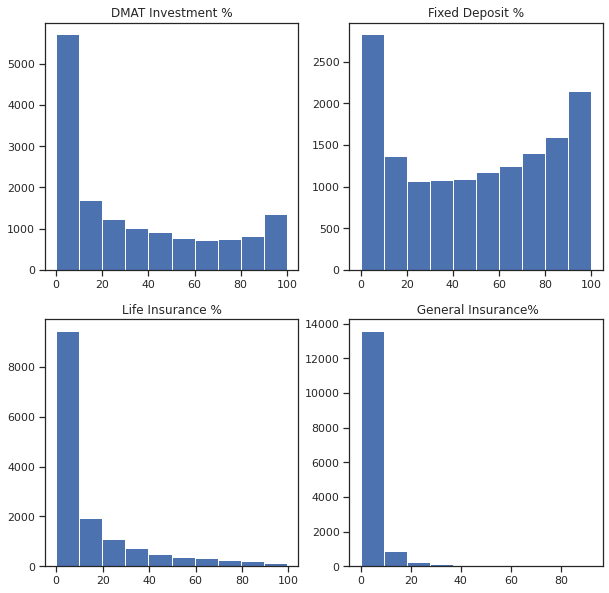

In [ ]:
fig = plt.figure(figsize=(10,10))
plt1=fig.add_subplot(221)
plt2=fig.add_subplot(222)
plt3=fig.add_subplot(223)
plt4=fig.add_subplot(224)

plt1.hist(TrainData['investment1_per'])
plt1.title.set_text('DMAT Investment %')

plt2.hist(TrainData['investment2_per'])
plt2.title.set_text('Fixed Deposit %')

plt3.hist(TrainData['investment3_per'])
plt3.title.set_text('Life Insurance %')

plt4.hist(TrainData['investment4_per'])
plt4.title.set_text(' General Insurance%')

1.   what we can observe that people most people do 0-10 % invetsment in DMAT [Low risk investors]
2.   what we can observe that people most people prefer FD as secure investments
3.   what we can observe that people 8000+ people invest in life insurance
4.   what we can observe that most of the people do not have general insurance

# **We can clearly see that people more often go for FD Investment and 2nd preference is given for DMAT.**


